In [4]:
from PIL import Image
import requests
from pathlib import Path
import os
from shoppingassistant.params import *

In [5]:

image_path = "https://encrypted-tbn3.gstatic.com/shopping?q=tbn:ANd9GcTySl_5o23O51Bpqhkolt8J-EsHo9vpuvi3zRsy9KXC2LSN6I8kcRzjCMpbSwwuPBIbM-c5144PsZCy9DJv_JO3VMF3dgWqMEsJXzr89Ho5e_7PHMX98--l"
image = requests.get(image_path, stream=True).content
with open(os.path.join(BASE_DIR, 'raw_data', 'test_images', 'temp.jpg'), 'wb') as f:
    f.write(image)

In [6]:
im = Image.open(os.path.join(BASE_DIR, 'raw_data', 'test_images', 'temp.jpg')).convert('RGB')
from matplotlib import pyplot as plt

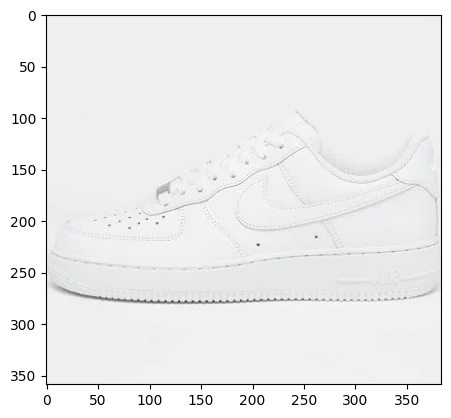

In [8]:
plt.imshow(im)

## Displaying the images from FastAPI call

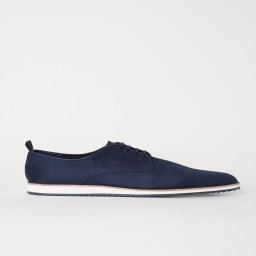

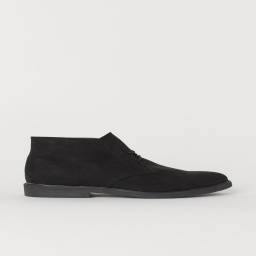

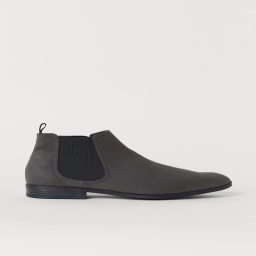

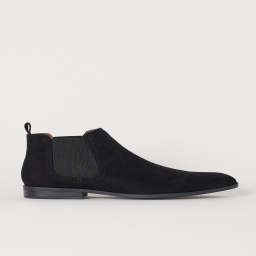

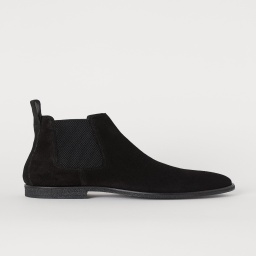

In [3]:
import requests
import base64
from IPython.display import display, Image

url = 'https://assets.adidas.com/images/w_600,f_auto,q_auto/7a42ee6702ea43b49b8c3ada469e818f_9366/Ultrarun_5_Running_Shoes_Black_IE8794_HM1.jpg'
response = requests.get(f"http://localhost:8000/predict", params={"image_path": url,
                                                        "top_k": 5}).json()

for img in response:
    display(Image(data=base64.b64decode(img["data"]), format="png"))

To use this code with streamlit, just replace display(Image()) by streamlit.image()
```
response =  response = requests.get(f"yourapiurl/predict", params={"data": inputvariables}).json()
for img in response:
    st.image(base64.b64decode(img["data"]), caption=img["name"])
```

In [ ]:
import streamlit as st
url = 'https://assets.adidas.com/images/w_600,f_auto,q_auto/7a42ee6702ea43b49b8c3ada469e818f_9366/Ultrarun_5_Running_Shoes_Black_IE8794_HM1.jpg'
response = requests.get(f"http://localhost:8000/predict", params={"image_path": url,
                                                        "top_k": 5}).json()
for img in response:
    st.image(base64.b64decode(img["data"]), caption=img["name"])

NameError: name 'inputvariables' is not defined

In [5]:
from tensorflow.keras.utils import to_categorical
from shoppingassistant.helper_functions import preprocess_single_image, load_images_and_labels
import numpy as np
import requests
import numpy as np
from PIL import Image
from io import BytesIO
from tensorflow.keras.models import load_model


2026-01-29 14:34:37.475002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769693677.527853   70655 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769693677.544864   70655 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769693677.589200   70655 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769693677.589232   70655 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769693677.589236   70655 computation_placer.cc:177] computation placer alr

In [23]:
categories = ['Baby/Children', 'Ladieswear', 'Menswear']
image_path = "../raw_data/test_images/temp.jpg"
img_array = preprocess_single_image(image_path)

model = load_model('../models/gender_classifier.keras')

predictions = model.predict(img_array, verbose=0 )
predictions

array([[0.3115879 , 0.16419554, 0.5242166 ]], dtype=float32)

In [18]:
categories

['Baby/Children', 'Ladieswear', 'Menswear']

In [19]:
predicted_idx = np.argmax(predictions[0])
predicted_idx

np.int64(2)

In [21]:
predicted_gender = categories[predicted_idx]
predicted_gender

'Menswear'